<a href="https://colab.research.google.com/github/shahal786/House-price-prediction-/blob/main/shahal_house_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude     Price  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122.25  341300.0  
4    -122.25  342200.0  


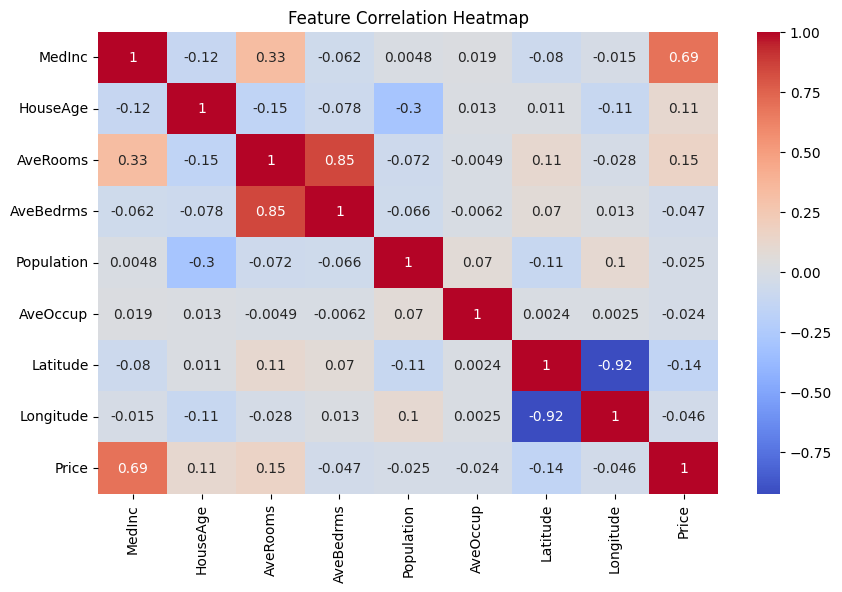

Mean Absolute Error (MAE): $53320.01
Mean Squared Error (MSE): $5558915986.95
Root Mean Squared Error (RMSE): $74558.14


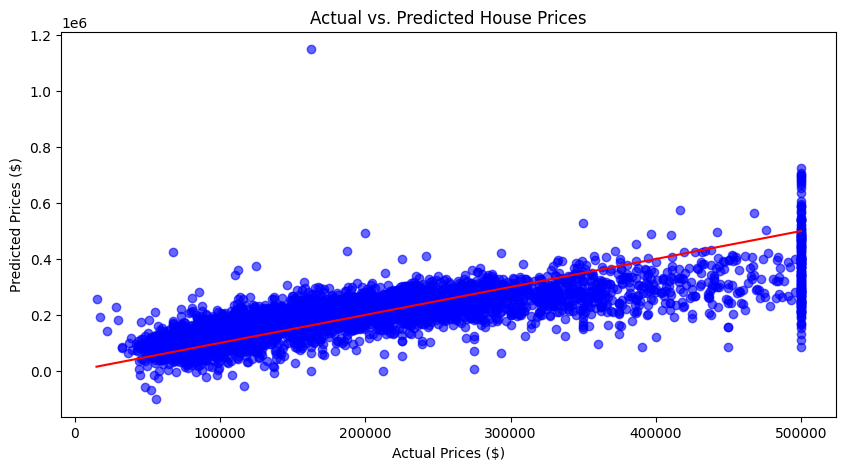

Predicted House Price: $276454.26


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#in house price prediction is the machine learning model, which analyzes historical data to identify patterns between features (like location, size, number of rooms) and the house price.
#It then uses these patterns to predict the price of new properties.
#Common algorithms used for this include linear regression, decision trees, and random fata, tested for accuracy,and used to make predictions based on the features of the house.




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset (Boston Housing Dataset)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target * 100000  # Convert to actual price values

# Display dataset info
print(df.head())

# Visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features (X) and target variable (y)
X = df.drop("Price", axis=1)  # All columns except "Price"
y = df["Price"]  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# Plot actual vs. predicted house prices
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# Predict price for a new house input
new_house = np.array([[8.0, 20.0, 5.0, 2.0, 0.3, 40.0, -120.0, 35.0]])  # Example features
predicted_price = model.predict(new_house)
print(f"Predicted House Price: ${predicted_price[0]:.2f}")